# Morphological Operations

Morphological operations are a set of image processing techniques that process images based on their shapes. These operations apply a structuring element to an input image and generate an output image. They are commonly used in tasks like noise removal, image enhancement, object segmentation, and edge detection.

In this notebook, we will explore the following basic morphological operations using OpenCV:

- **Erosion**
- **Dilation**
- **Opening**
- **Closing**
- **Morphological Gradient**

We will demonstrate each operation using simple binary images and visualize the effect of each transformation.

---


<div style="text-align: center;">
  <a href="https://colab.research.google.com/github/MinooSdpr/opencv-python-tutorial/blob/main/Opencv-04.ipynb">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" />
  </a>
  &nbsp;
  <a href="https://github.com/MinooSdpr/opencv-python-tutorial/blob/main/Opencv-04.ipynb">
    <img src="https://img.shields.io/badge/Open%20in-GitHub-24292e?logo=github&logoColor=white" alt="Open In GitHub" />
  </a>
</div>

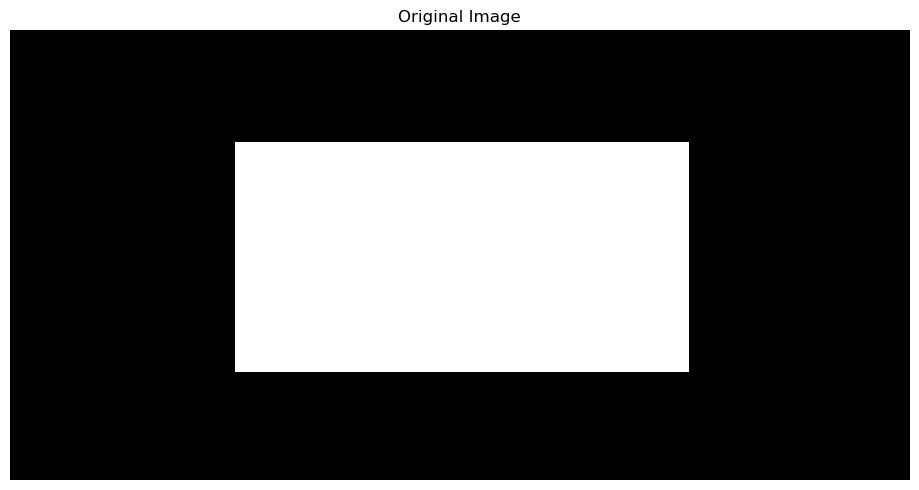

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def show_images(images, titles, cmap='gray'):
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(images[i], cmap=cmap)
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

image = np.zeros((100, 200), dtype=np.uint8)
cv.rectangle(image, (50, 25), (150, 75), 255, -1)

show_images([image], ["Original Image"])


## Erosion

**Erosion** is a morphological operation that erodes away the boundaries of the foreground (white) object. It works by sliding a kernel (usually a square or cross-shaped structuring element) over the image. A pixel in the output image will be set to the minimum value covered by the kernel.

This operation is useful for:

- Removing small white noise
- Detaching connected objects
- Shrinking object boundaries

### `cv.erode()` Function Breakdown

The `cv.erode()` function in OpenCV applies the **erosion** morphological operation to an image. Below is a breakdown of its parameters:

| Parameter       | Description |
|----------------|-------------|
| `src`           | The source image. This should be a **binary or grayscale** image. In our case, it's the `mask` created using thresholding. |
| `kernel`        | The structuring element used for erosion. This is usually a matrix of ones. The size and shape of the kernel determine how much the image is eroded. |
| `iterations`    | The number of times erosion is applied. Increasing this value will **further erode** the white regions. |
| `dst` *(optional)* | The output image. If not provided, the result is returned. |
| `borderType` *(optional)* | Pixel extrapolation method, e.g., `cv.BORDER_CONSTANT`. Default is `cv.BORDER_CONSTANT`. |
| `borderValue` *(optional)* | Value used in case of a constant border. Default is 0. |


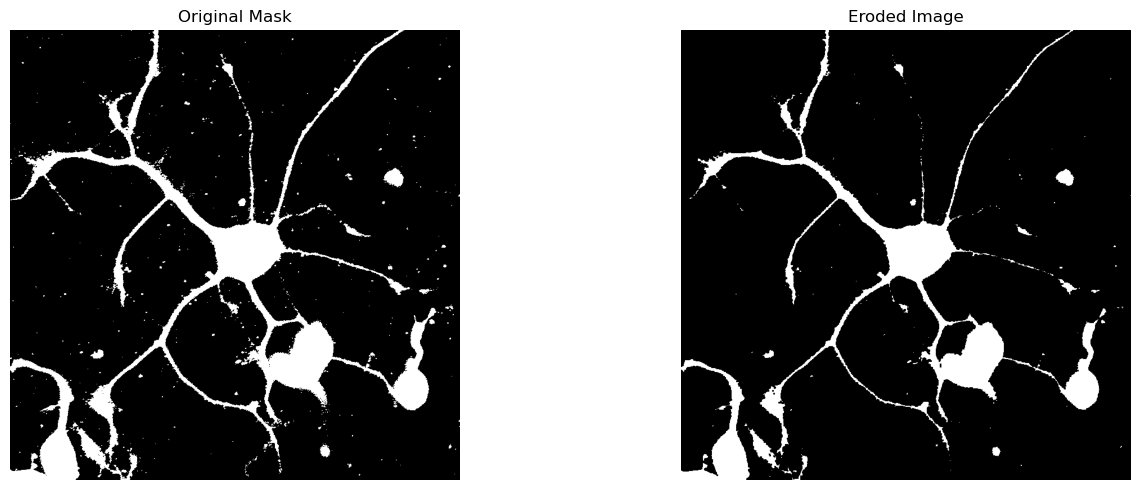

In [3]:
original_img = cv.imread("Neuron.jpg", 0)
_, mask = cv.threshold(original_img, 25, 255, cv.THRESH_BINARY)

kernel = np.ones((3,3), np.uint8)
eroded_img = cv.erode(mask, kernel, iterations=1)


show_images([mask, eroded_img], ["Original Mask", "Eroded Image"])

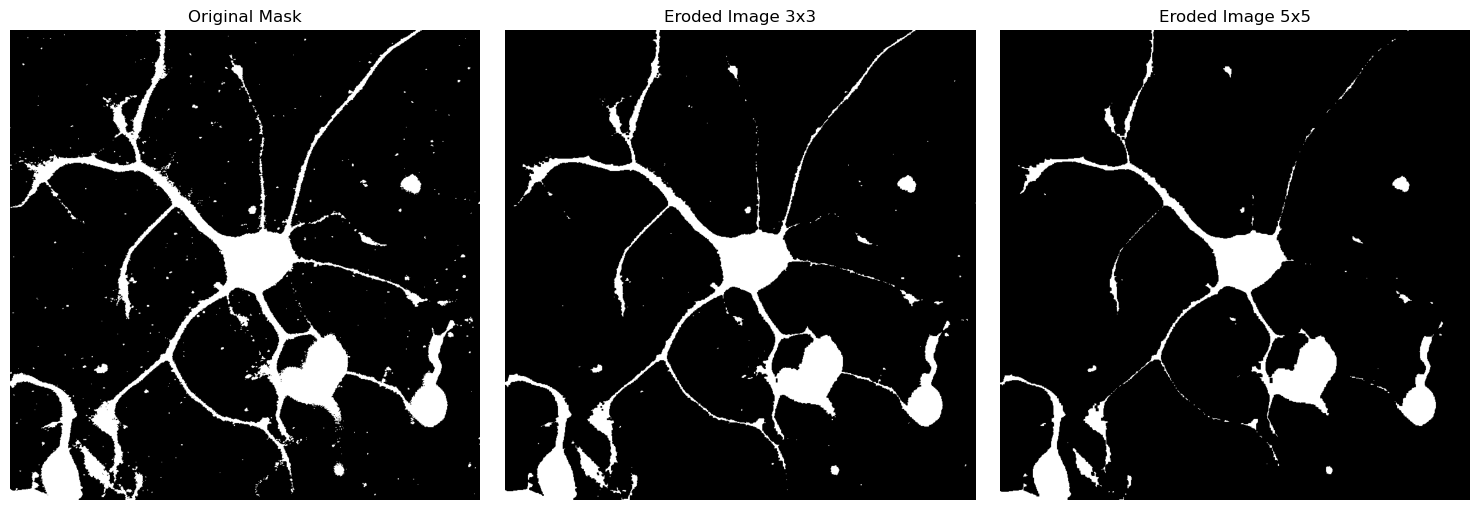

In [5]:
kernel2 = np.ones((5, 5), np.uint8)
eroded_img2 = cv.erode(mask, kernel2, iterations=1)


show_images([mask, eroded_img,  eroded_img2], ["Original Mask", "Eroded Image 3x3", "Eroded Image 5x5"])

## Dilation

**Dilation** is a morphological operation that grows or thickens the white regions (foreground) in a binary image. It is the opposite of erosion.

A kernel (structuring element) slides across the image, and a pixel is set to the **maximum** value covered by the kernel. This operation is commonly used for:

- Connecting broken parts of an object
- Filling small holes and gaps
- Enhancing features like ridges or lines

### Effect of Kernel Size

In this example, we apply dilation to a fingerprint mask using two different kernel sizes:

- **5×5 kernel**: Slightly enlarges the white regions while preserving finer details.
- **25×25 kernel**: Strongly expands the white regions, causing merging of nearby structures and loss of detail.

Using a larger kernel can help in joining disconnected components, but may also over-smooth or distort features.

### `cv.dilate()` Parameter Reference

| Parameter         | Type                      | Description |
|------------------|---------------------------|-------------|
| `src`            | `numpy.ndarray`           | **Source image** (grayscale or binary) to which dilation is applied. In this case, it's the `mask` created from thresholding. |
| `kernel`         | `numpy.ndarray`           | **Structuring element** used for dilation. It's typically a matrix of 1s. Controls the shape and size of dilation. |
| `iterations`     | `int`                     | Number of times dilation is applied. Increasing this will **amplify** the effect of dilation. |
| `dst` *(optional)* | `numpy.ndarray`         | Optional output image. If not specified, the function returns the result. |
| `borderType` *(optional)* | `int` (OpenCV flag) | Pixel extrapolation method at image borders. Default is `cv.BORDER_CONSTANT`. |
| `borderValue` *(optional)* | `int` or `float`   | Border value in case of `cv.BORDER_CONSTANT`. Default is `0`. |


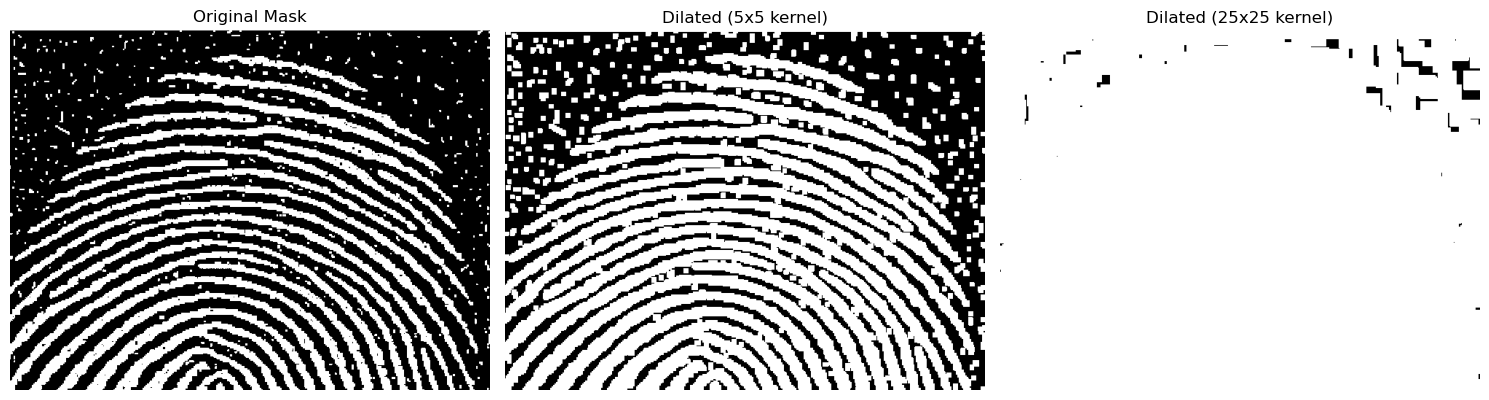

In [6]:
original_img = cv.imread("fingerprint.png", 0)

_, mask = cv.threshold(original_img, 25, 255, cv.THRESH_BINARY)

kernel_small = np.ones((5, 5), np.uint8)
kernel_large = np.ones((25, 25), np.uint8)

dilated_small = cv.dilate(mask, kernel_small, iterations=1)
dilated_large = cv.dilate(mask, kernel_large, iterations=1)


show_images([mask, dilated_small, dilated_large],
    ["Original Mask", "Dilated (5x5 kernel)", "Dilated (25x25 kernel)"])


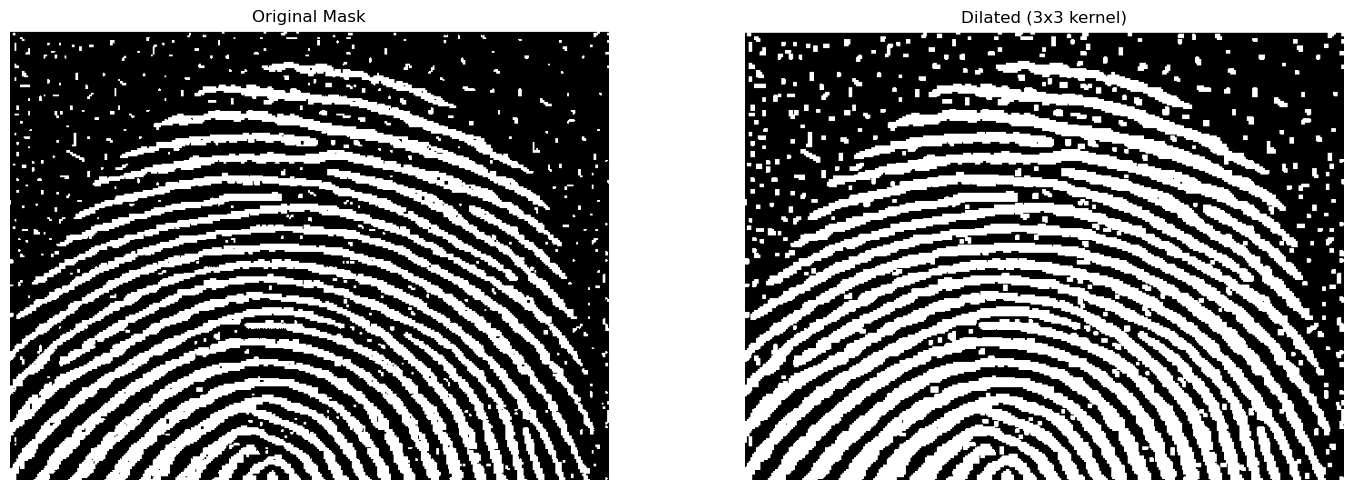

In [8]:
kernel_3x3 = np.ones((3, 3), np.uint8)

dilated_3x3 = cv.dilate(mask, kernel_3x3, iterations=1)

show_images(
    [mask, dilated_3x3],
    ["Original Mask", "Dilated (3x3 kernel)"]
)


## Morphological Closing

**Closing** is a morphological operation that involves **dilation followed by erosion**. It is used to:

- Close small holes or gaps **inside** foreground (white) objects
- Connect nearby white regions
- Smooth contours while preserving the general shape

The operation is especially useful for cleaning up noise **inside** the objects, rather than removing specks outside.

### `cv.morphologyEx()` Parameter Reference

The `cv.morphologyEx()` function is used to apply advanced morphological operations in OpenCV, such as **Closing**, **Opening**, **Gradient**, etc.

In this case, we use it to apply **Closing**.

| Parameter        | Type            | Description |
|------------------|------------------|-------------|
| `src`            | `numpy.ndarray`  | The **source image** (binary or grayscale). In this case, it's `mask`, a thresholded fingerprint image. |
| `op`             | `int` (OpenCV flag) | The **type of morphological operation** to perform. Here, `cv.MORPH_CLOSE`, which is dilation followed by erosion. |
| `kernel`         | `numpy.ndarray`  | The **structuring element** used to define the shape and size of the operation. Here, `kernel2 = np.ones((15,15), np.uint8)`. |
| `dst` *(optional)* | `numpy.ndarray` | Output image. If not provided, the result is returned. |
| `iterations` *(optional)* | `int`        | Number of times the operation is applied. Default is `1`. |
| `borderType` *(optional)* | `int` (OpenCV flag) | Pixel extrapolation method at image borders. Default is `cv.BORDER_CONSTANT`. |
| `borderValue` *(optional)* | `int` or `float` | Value used in case of a constant border. Default is `0`. |

#### Operation (`op`) Options

| Constant              | Operation Name         | Description |
|-----------------------|------------------------|-------------|
| `cv.MORPH_ERODE`      | Erosion                | Erodes away the boundaries of the foreground object. Equivalent to `cv.erode()`. |
| `cv.MORPH_DILATE`     | Dilation               | Increases the object area by adding pixels to the boundary. Equivalent to `cv.dilate()`. |
| `cv.MORPH_OPEN`       | Opening                | Erosion followed by dilation. Removes small noise from the foreground. |
| `cv.MORPH_CLOSE`      | Closing                | Dilation followed by erosion. Fills small holes and gaps in the foreground. |
| `cv.MORPH_GRADIENT`   | Morphological Gradient | The difference between dilation and erosion. Highlights object outlines. |
| `cv.MORPH_TOPHAT`     | Top Hat                | The difference between the input image and its opening. Useful for enhancing bright objects on dark backgrounds. |
| `cv.MORPH_BLACKHAT`   | Black Hat              | The difference between the closing of the image and the input image. Useful for enhancing dark features on a bright background. |
| `cv.MORPH_HITMISS`*   | Hit-or-Miss            | Used for detecting specific patterns in binary images (requires binary input and specially designed kernels). |

> ⚠️ `cv.MORPH_HITMISS` is only available in OpenCV 3.3.1+ and works **only with binary images** using a specially designed kernel.



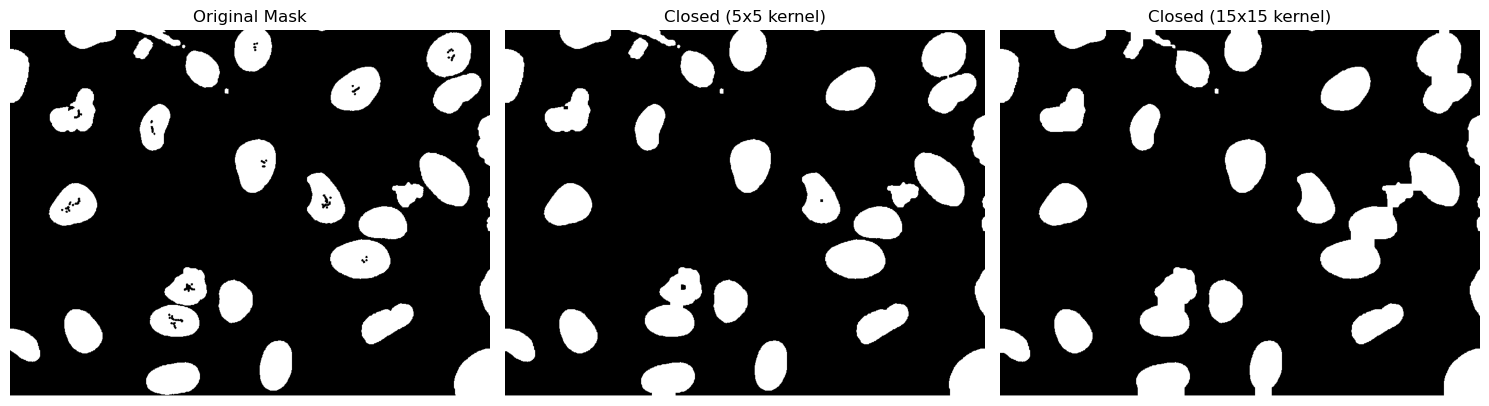

In [11]:
original_img = cv.imread("cells_threshold.png", 0)
_, mask = cv.threshold(original_img, 25, 255, cv.THRESH_BINARY)

kernel1 = np.ones((5, 5), np.uint8)
kernel2 = np.ones((15, 15), np.uint8)


closed_img1 = cv.morphologyEx(mask, cv.MORPH_CLOSE, kernel1)
closed_img2 = cv.morphologyEx(mask, cv.MORPH_CLOSE, kernel2)


show_images(
    [mask, closed_img1, closed_img2],
    ["Original Mask", "Closed (5x5 kernel)", "Closed (15x15 kernel)"]
)


## Morphological Opening

**Opening** is a morphological operation that consists of **erosion followed by dilation**. It is used to:

- Remove small noise or white specks from the foreground objects
- Separate objects that are close together but not connected
- Smooth object boundaries without significantly changing the size of the objects

### How it works:
- **Erosion** removes small bright spots (noise).
- **Dilation** restores the size of the remaining objects after erosion.


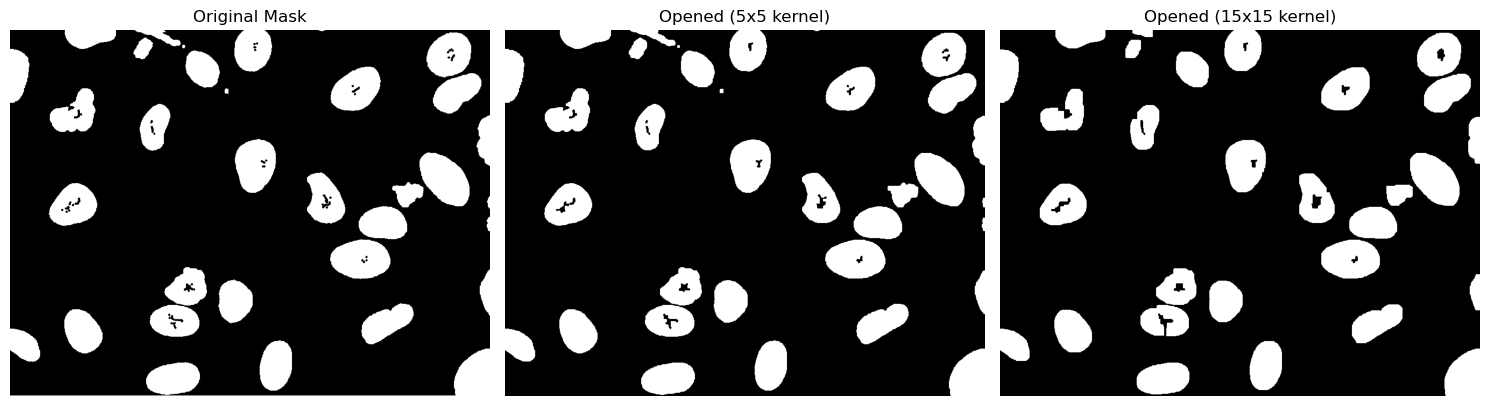

In [12]:
kernel1 = np.ones((5, 5), np.uint8)
kernel2 = np.ones((15, 15), np.uint8)

opened_img1 = cv.morphologyEx(mask, cv.MORPH_OPEN, kernel1)
opened_img2 = cv.morphologyEx(mask, cv.MORPH_OPEN, kernel2)


show_images(
    [mask, opened_img1, opened_img2],
    ["Original Mask", "Opened (5x5 kernel)", "Opened (15x15 kernel)"]
)

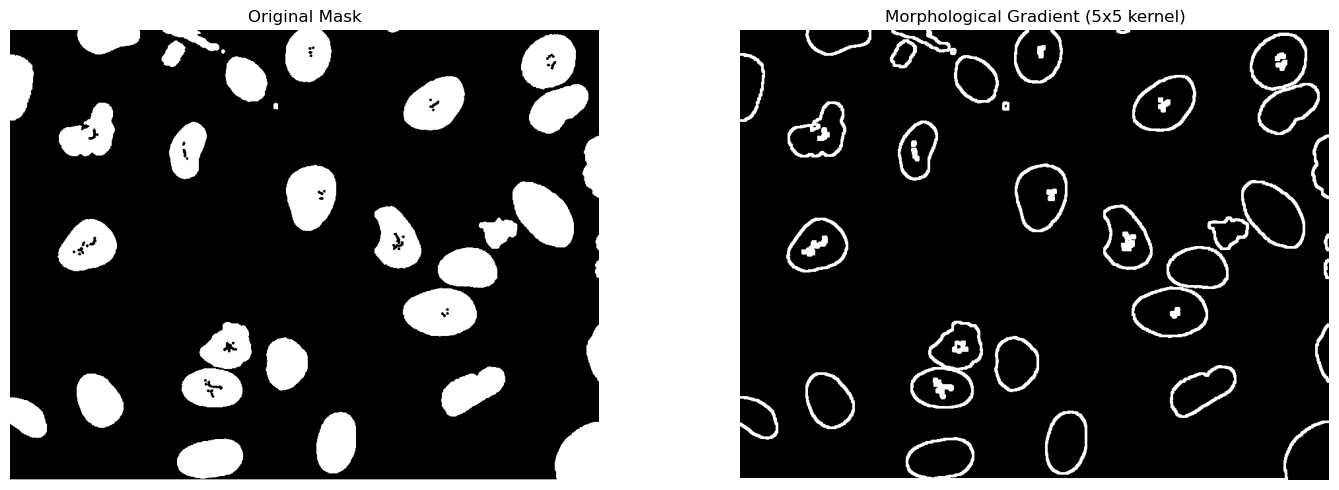

In [13]:
kernel = np.ones((5, 5), np.uint8)

gradient_img = cv.morphologyEx(mask, cv.MORPH_GRADIENT, kernel)

show_images(
    [mask, gradient_img],
    ["Original Mask", "Morphological Gradient (5x5 kernel)"]
)


<div style="float:right;">
  <a href="https://github.com/MinooSdpr/opencv-python-tutorial/blob/main/Opencv-05.ipynb"
     style="
       display:inline-block;
       padding:8px 20px;
       background-color:#414f6f;
       color:white;
       border-radius:12px;
       text-decoration:none;
       font-family:sans-serif;
       transition:background-color 0.3s ease;
     ">
    ▶️ Next
  </a>
</div>